In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tabel Customers





In [ ]:
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()

In [ ]:
customers_df.info()

**Terdapat missing values pada kolom gender (terdapat sedikit perbedaan pada jumlah data pada kolom gender)**


In [ ]:
# menampilkan informasi terkait jumlah missing values
customers_df.isna().sum()

In [ ]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

In [ ]:
# Menghapus duplikat
customers_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

In [ ]:
# melihat data yang mengandung missing value
customers_df[customers_df.gender.isna()]

In [ ]:
# Menangani missing value dengan metode imputation
# mengidentifikasi nilai yang dominan
customers_df.gender.value_counts()

*diketahui bahwa nilai yang paling dominan dalam kolom gender ialah “Prefer not to say”*

In [ ]:
# Mengganti missing value dengan “Prefer not to say”
customers_df.fillna(value="Prefer not to say", inplace=True)

In [ ]:
customers_df.isna().sum()

In [ ]:
# memeriksa parameter statistik
customers_df.describe()

**Terdapat keanehan pada nilai *maksimum* yang terdapat pada kolom age, ini kemungkinan besar terjadi karena adanya *inaccurate value* pada kolom tersebut.**

In [ ]:
# melihat data baris data yang mengandung inaccurate value pada kolom age
customers_df[customers_df.age == customers_df.age.max()]

*kita bisa berasumsi bahwa inaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai nol. *

In [ ]:
customers_df.age.replace(customers_df.age.max(), 70, inplace=True)

In [ ]:
customers_df[customers_df.age == customers_df.age.max()]

In [ ]:
customers_df.age.replace(customers_df.age.max(), 50, inplace=True)

In [ ]:
customers_df.describe()

# Eksplorasi Data *customers_df*

In [ ]:
customers_df.describe(include="all")

In [ ]:
# Melihat demografi pelanggan berdasarkan jenis kelamin (gender).
customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
})

In [ ]:
# melihat persebaran jumlah pelanggan berdasarkan kota (city).
customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False)

In [ ]:
# melihat persebaran jumlah pelanggan berdasarkan negara bagian (state).
customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False)

# Tabel Orders


In [ ]:
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()

In [ ]:
orders_df.info()

***terdapat kesalahan tipe data untuk kolom order_date & delivery_date. Harusnya direpresentasikan sebagai tipe data datetime, bukan object (ini digunakan untuk tipe data string) ***

In [ ]:
# mengganti tipe data pada kolom order_date & delivery_date menjadi datetime
datetime_columns = ["order_date", "delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [ ]:
orders_df.info()

In [ ]:
# memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

# Eksplorasi Data orders_df

In [ ]:
delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
orders_df.head()

In [ ]:
orders_df.describe(include="all")

*Berdasarkan hasil tersebut, dapat diketahui bahwa rata-rata waktu pengiriman sebesar 14 hari dengan nilai maksimum sebesar 27 hari dan nilai minimum sebesar 1 hari.*

# Eksplorasi Data orders_df dan customers_df

In [ ]:
# mengidentifikasi pelanggan yang belum pernah melakukan order
customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

In [ ]:
# jumlah pelanggan yang berstatus “Active” dan “Non Active”
customers_df.groupby(by="status").customer_id.count()

*terlihat pada table pivot diatas, terdapat sekitar 30% pelanggan yang belum melakukan order*

In [ ]:
# merge table cutomers dengan table order
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

In [ ]:
# pivot table untuk memperoleh informasi terkait jumlah order berdasarkan kota
orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

In [ ]:
# Jumlah order berdasarkan state
orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False)

In [ ]:
# Jumlah order berdasarkan gender
orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False)

In [ ]:
# Jumlah order berdasarkan kelompok usia
orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False)

# Tabel Product

In [ ]:
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()

In [ ]:
product_df.info()

In [ ]:
# Memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ", product_df.duplicated().sum())
product_df.describe()

In [ ]:
product_df.drop_duplicates(inplace=True)

In [ ]:
print("Jumlah duplikasi: ", product_df.duplicated().sum())

# Tabel Sales


In [ ]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()

In [ ]:
sales_df.info()

**terdapat keanehan pada jumlah data pada kolom total_price. Hal ini menunjukkan adanya missing value pada kolom tersebut. **

In [ ]:
# Cek jumlah missing value
sales_df.isna().sum()

In [ ]:
# melihat baris data yang mengandung missing value pada kolom total_price.
sales_df[sales_df.total_price.isna()]

***kita menemukan bahwa nilai total_price merupakan hasil perkalian antara price_per_unit dan quantity. Kita dapat menggunakan pola ini untuk menangani missing value pada kolom total_price. ***

In [ ]:
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]

In [ ]:
# memeriksa kembali jumlah missing value pada sales_df.
sales_df.isna().sum()

In [ ]:
# memeriksa duplikasi dan ringkasan parameter statistik
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()

# Eksplorasi Data product_df dan sales_df

In [ ]:
product_df.describe(include="all")

*dilihat bahwa harga barang yang dijual berkisar antara 90 hingga 119 dolar.*

In [ ]:
sales_df.describe(include="all")

*dalam setiap transaksi, pelanggan paling banyak membeli 3 buah item dalam satu jenis produk dengan total harga sebesar 357 dolar.*

In [ ]:
# Melihat produk yang memiliki harga termahal dan terendah
product_df.sort_values(by="price", ascending=False)

In [ ]:
# pivot table untuk mencari informasi terkait produk berdasarkan tipe
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})

In [ ]:
# pivot table untuk mencari informasi terkait produk berdasarkan nama produknya.
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

In [ ]:
# Melihat produk terlaris dengan menyatukan (merge) tabel product_df dan sales_df
sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

In [ ]:
# melihat informasi penjualan produk berdasarkan tipenya
sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

*Trousers merupakan tipe produk yang paling laris. Akan tetapi, jika dilihat berdasarkan revenue yang diterima, Jacket merupakan tipe produk yang paling banyak menyumbang revenue perusahaan.*

In [ ]:
# melihat informasi penjualan produk berdasarkan nama product
sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

*diketahui bahwa produk Denim merupakan produk yang paling laris dan juga paling banyak menyumbang revenue terhadap perusahaan.*  

# Eksplorasi Data all_df

In [ ]:
# melihat pola pembelian berdasarkan demografi pelanggan.
all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

In [ ]:
# Melihat preferensi pembelian berdasarkan state pelanggan dan tipe produk
all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

In [ ]:
# Melihat selera tipe produk pelanggan berdasarkan gender.
all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

In [ ]:
# Melihat selera tipe produk pelanggan berdasarkan kelompok usia.
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

# **Data Visualization **

In [ ]:
# mengubah frekuensi data untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh setiap bulannya.
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

*melakukan resample data order_date menjadi bulanan serta melakukan agregasi untuk memperoleh informasi terkait jumlah order dan total revenue yang diperoleh tiap bulan.*

In [ ]:
# jumlah order per bulan.
monthly_orders_df = all_df.resample(rule='M', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan

monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

plt.figure(figsize=(10, 5))
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#9f44ee")
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Total revenue per bulan
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#9f44ee"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

*kita harus mencari tahu penyebab terjadinya penurunan tersebut dengan mempertimbangkan banyak hal, seperti keberadaan kompetitor, campaign, dll.*

In [ ]:
# Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
# DataFrame baru guna menampung informasi terkait jumlah penjualan tiap produk.
sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(x="quantity_x", y="product_name", data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

*Berdasarkan visualisasi di atas, Anda dapat melihat bahwa produk Denim merupakan produk yang paling laris. Kontras dengan hal tersebut, produk Mandarin Collar merupakan produk yang paling sedikit terjual.*  

In [ ]:
# Bagaimana Demografi Pelanggan yang Kita Miliki?
# Berdasarkan gender
bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

plt.figure(figsize=(10, 5))

sns.barplot(
    y="customer_count",
    x="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=colors
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
# Berdasarkan age
byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    y="customer_count",
    x="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

In [ ]:
# Berdasarkan states
bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count",
    y="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

In [ ]:
# RFM Analysis
# Recency: parameter yang digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi.
# Frequency: parameter ini digunakan untuk mengidentifikasi seberapa sering seorang pelanggan melakukan transaksi.
# Monetary: parameter terakhir ini digunakan untuk mengidentifikasi seberapa besar revenue yang berasal dari pelanggan tersebut.
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

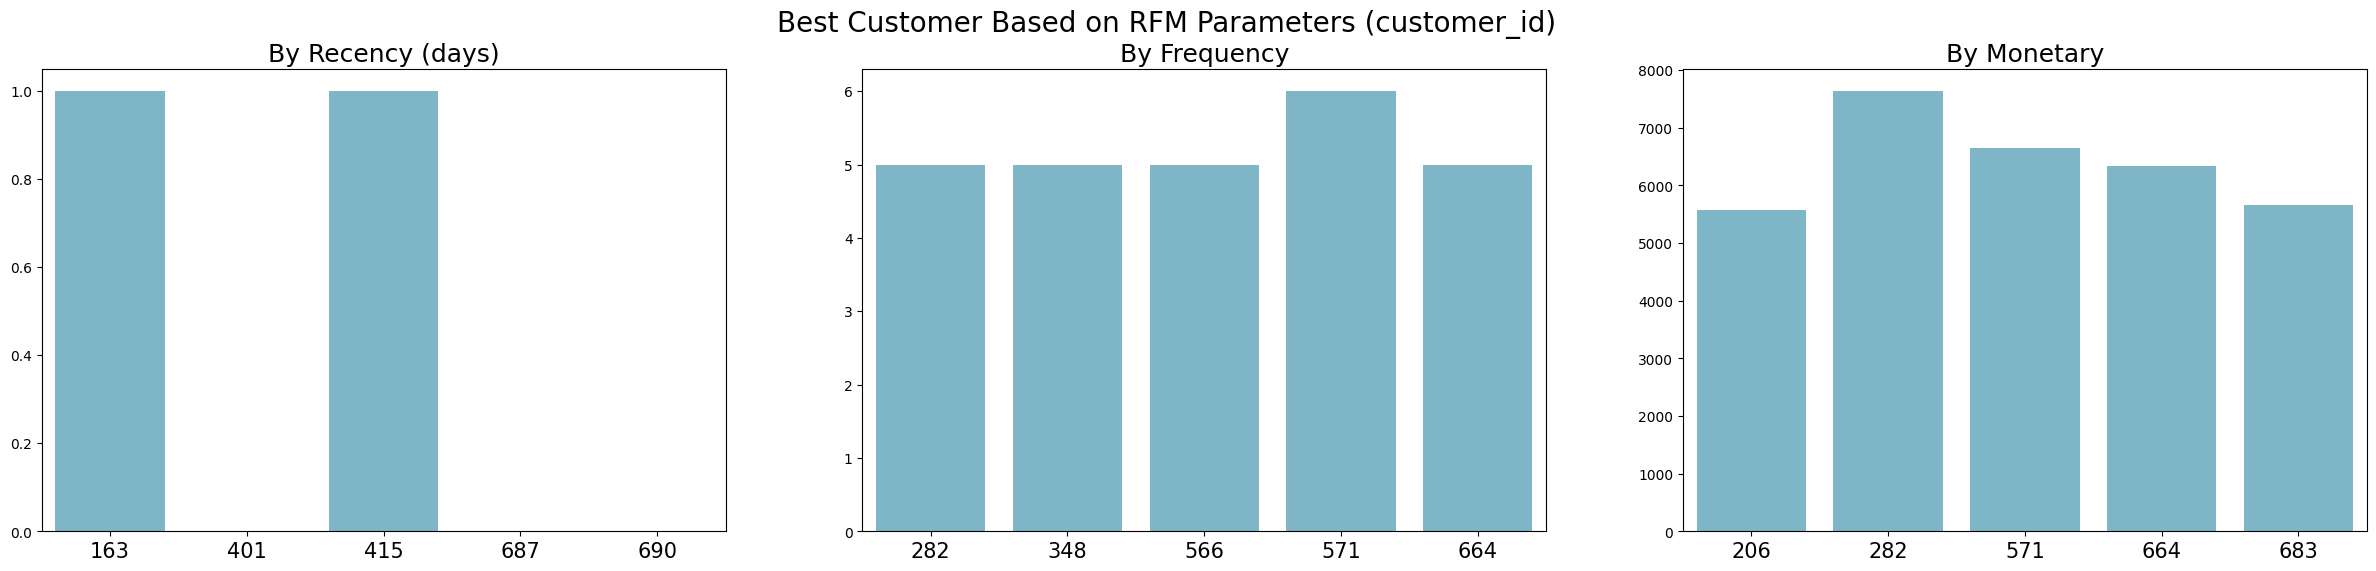

In [ ]:
# mengidentifikasi best customer berdasarkan parameter frequency, monetary, dan recancy
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [ ]:
all_df.to_csv("all_data.csv", index=False)